In [1]:
%matplotlib inline
from eden_wrapper import EdenWrapper
from utilities import Weblogo

In [2]:
train = [
    ('ce1cg', 
     'TAATGTTTGTGCTGGTTTTTGTGGCATCGGGCGAGAATAGCGCGTGGTGTGAAAGACTGTTTTTTTGATCGTTTTCACAAAAATGGAAGTCCACAGTCTTGACAG'),
    ('ara', 
     'GACAAAAACGCGTAACAAAAGTGTCTATAATCACGGCAGAAAAGTCCACATTGATTATTTGCACGGCGTCACACTTTGCTATGCCATAGCATTTTTATCCATAAG'),
    ('bglr1', 
     'ACAAATCCCAATAACTTAATTATTGGGATTTGTTATATATAACTTTATAAATTCCTAAAATTACACAAAGTTAATAACTGTGAGCATGGTCATATTTTTATCAAT'),
    ('crp', 
     'CACAAAGCGAAAGCTATGCTAAAACAGTCAGGATGCTACAGTAATACATTGATGTACTGCATGTATGCAAAGGACGTCACATTACCGTGCAGTACAGTTGATAGC'),
    ('cya', 
     'ACGGTGCTACACTTGTATGTAGCGCATCTTTCTTTACGGTCAATCAGCAAGGTGTTAAATTGATCACGTTTTAGACCATTTTTTCGTCGTGAAACTAAAAAAACC'),
    ('deop2', 
     'AGTGAATTATTTGAACCAGATCGCATTACAGTGATGCAAACTTGTAAGTAGATTTCCTTAATTGTGATGTGTATCGAAGTGTGTTGCGGAGTAGATGTTAGAATA'),
    ('gale', 
     'GCGCATAAAAAACGGCTAAATTCTTGTGTAAACGATTCCACTAATTTATTCCATGTCACACTTTTCGCATCTTTGTTATGCTATGGTTATTTCATACCATAAGCC'),
    ('ilv', 
     'GCTCCGGCGGGGTTTTTTGTTATCTGCAATTCAGTACAAAACGTGATCAACCCCTCAATTTTCCCTTTGCTGAAAAATTTTCCATTGTCTCCCCTGTAAAGCTGT'),
    ('lac', 
     'AACGCAATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGGAATTGTGAGCGGATAACAATTTCAC'),
    ('male', 
     'ACATTACCGCCAATTCTGTAACAGAGATCACACAAAGCGACGGTGGGGCGTAGGGGCAAGGAGGATGGAAAGAGGTTGCCGTATAAAGAAACTAGAGTCCGTTTA'),
    ('malk', 
     'GGAGGAGGCGGGAGGATGAGAACACGGCTTCTGTGAACTAAACCGAGGTCATGTAAGGAATTTCGTGATGTTGCTTGCAAAAATCGTGGCGATTTTATGTGCGCA'),
    ('malt', 
     'GATCAGCGTCGTTTTAGGTGAGTTGTTAATAAAGATTTGGAATTGTGACACAGTGCAAATTCAGACACATAAAAAAACGTCATCGCTTGCATTAGAAAGGTTTCT'),
    ('ompa', 
     'GCTGACAAAAAAGATTAAACATACCTTATACAAGACTTTTTTTTCATATGCCTGACGGAGTTCACACTTGTAAGTTTTCAACTACGTTGTAGACTTTACATCGCC'),
    ('tnaa', 
     'TTTTTTAAACATTAAAATTCTTACGTAATTTATAATCTTTAAAAAAAGCATTTAATATTGCTCCCCGAACGATTGTGATTCGATTCACATTTAAACAATTTCAGA'),
    ('uxu1', 
     'CCCATGAGAGTGAAATTGTTGTGATGTGGTTAACCCAATTAGAATTCGGGATTGACATGTCTTACCAAAAGGTAGAACTTATACGCCATCTCATCCGATGCAAGC'),
    ('pbr322', 
     'CTGGCTTAACTATGCGGCATCAGAGCAGATTGTACTGAGAGTGCACCATATGCGGTGTGAAATACCGCACAGATGCGTAAGGAGAAAATACCGCATCAGGCGCTC'),
    ('trn9cat', 
     'CTGTGACGGAAGATCACTTCGCAGAATAAATAAATCCTGGTGTCCCTGTTGATACCGGGAAGCCCTGGGCCAACTTTTGGCGAAAATGAGACGTTGATCGGCACG'),
    ('tdc', 
     'GATTTTTATACTTTAACTTGTTGATATTTAAAGGTATTTAATTGTAATAACGATACTCTGGAAAGTATTGAAAGTTAATTTGTGAGTGGTCGCACATATCCTGTT'),
    ]

# test data consists of first 9 sequences of training data
test = train[:9]

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

wl=Weblogo(color_scheme = 'classic')

ew = EdenWrapper(alphabet='dna',
                # distance=10, 
                # radius=5, 
                clustering_algorithm=km,
                threshold=0,
                
                weblogo_obj=wl)

ew.fit(seqs=train)

In [4]:
for i in ew.original_motives_list:
    for j in i:
        print j
    print

(1, 'TTTCACAAAA')
(1, 'GCATAAAAAA')
(1, 'TTACACAAA')
(1, 'TCACACAAAG')

(2, 'ACATTACC')
(1, 'TCACATTACC')
(1, 'GCATTACAG')

(1, 'TTTACACTTT')
(1, 'TTGTTGTGA')
(1, 'TCACACTTTT')



In [5]:
for i in ew.aligned_motives_list:
    for j in i:
        print j
    print 

(1, 'TTTCACAAAA')
(1, 'GCATAAAAAA')
(1, 'TTACACAAA-')
(1, 'TCACACAAAG')

(2, '--ACATTACC-')
(1, 'TCACATTACC-')
(1, '--GCATTACAG')

(1, 'TTTACACTTT-')
(1, '-TTGTTGTGA-')
(1, '-TCACACTTTT')



In [6]:
for i in ew.motives_list:
    for j in i:
        print j
    print

(1, 'TTTCACAAAA')
(1, 'GCATAAAAAA')
(1, 'TTACACAAAA')
(1, 'TCACACAAAG')

(2, 'ACATTACC')
(1, 'ACATTACC')
(1, 'GCATTACA')

(1, 'TTACACTTT')
(1, 'TTGTTGTGA')
(1, 'TCACACTTT')



In [7]:
predictions = ew.predict(input_seqs=test, return_list=True)
for p in predictions: print p

[0]
[]
[0]
[1]
[]
[1]
[0]
[]
[]


In [8]:
predictions = ew.predict(input_seqs=test, return_list=False)
for p in predictions: print p

1
0
1
1
0
1
1
0
0


In [9]:
match = ew.transform(input_seqs=test, return_match=True)
for m in match: print m

[[(73, 83, 0.0263671875)], [], []]
[[], [], []]
[[(61, 71, 0.03955078125)], [], []]
[[], [(77, 88, 0.016460905349794237)], []]
[[], [], []]
[[], [(21, 32, 0.004115226337448559)], []]
[[(3, 13, 0.0029296875)], [], []]
[[], [], []]
[[], [], []]


In [10]:
match = ew.transform(input_seqs=test, return_match=False)
for m in match: print m

[1, 0, 0]
[0, 0, 0]
[1, 0, 0]
[0, 1, 0]
[0, 0, 0]
[0, 1, 0]
[1, 0, 0]
[0, 0, 0]
[0, 0, 0]


In [11]:
ew2= EdenWrapper(alphabet='dna',
                   # distance=10, 
                   # radius=5, 
                   clustering_algorithm=km)
predictions = ew2.fit_predict(seqs=train)
for p in predictions: print p

0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0


In [12]:
matches = ew2.fit_transform(seqs=train)
for m in matches: print m

[1, 0, 0]
[0, 1, 0]
[1, 0, 0]
[1, 0, 0]
[0, 0, 0]
[0, 1, 0]
[0, 1, 0]
[0, 0, 0]
[1, 0, 0]
[1, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 1, 0]
[0, 0, 0]
[1, 0, 0]
[0, 0, 0]
[0, 1, 0]
[0, 0, 0]


In [13]:
#printing motives as lists
for motif in ew.motives_list:
    for m in motif:
        print m
    print

(1, 'TTTCACAAAA')
(1, 'GCATAAAAAA')
(1, 'TTACACAAAA')
(1, 'TCACACAAAG')

(2, 'ACATTACC')
(1, 'ACATTACC')
(1, 'GCATTACA')

(1, 'TTACACTTT')
(1, 'TTGTTGTGA')
(1, 'TCACACTTT')



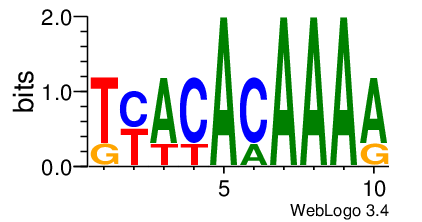

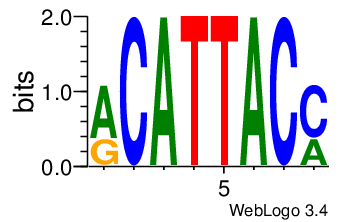

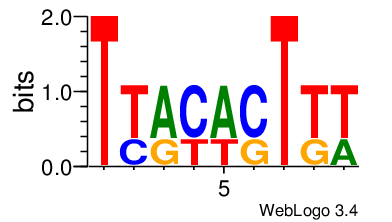

In [14]:
ew.display_logo(do_alignment=False)

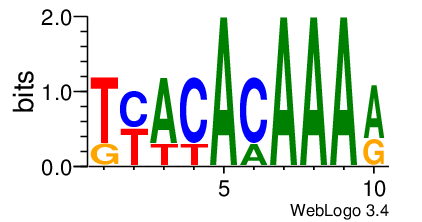

In [15]:
ew.display_logo(motif_num=1)

In [16]:
ew.align_motives()    #MSA with Muscle
motives1=ew.aligned_motives_list
for m in motives1:
    for i in m:
        print i
    print

(1, 'TTTCACAAAA')
(1, 'GCATAAAAAA')
(1, 'TTACACAAAA')
(1, 'TCACACAAAG')

(2, 'ACATTACC')
(1, 'ACATTACC')
(1, 'GCATTACA')

(1, 'TTACACTTT')
(1, 'TTGTTGTGA')
(1, 'TCACACTTT')



In [17]:
from utilities import MotifWrapper
pwm1 = MotifWrapper(alphabet='dna', pseudocounts=0)

motives=ew.motives_list
pwm1.fit(motives)

In [18]:
ew.display()

        0      1      2      3      4      5      6      7      8      9
-:   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.25
A:   0.00   0.00   0.75   0.00   1.00   0.25   1.00   1.00   1.00   0.50
C:   0.00   0.50   0.00   0.75   0.00   0.75   0.00   0.00   0.00   0.00
G:   0.25   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.25
T:   0.75   0.50   0.25   0.25   0.00   0.00   0.00   0.00   0.00   0.00

        0      1      2      3      4      5      6      7      8      9     10
-:   0.67   0.67   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.67
A:   0.00   0.00   0.67   0.00   1.00   0.00   0.00   1.00   0.00   0.33   0.00
C:   0.00   0.33   0.00   1.00   0.00   0.00   0.00   0.00   1.00   0.67   0.00
G:   0.00   0.00   0.33   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.33
T:   0.33   0.00   0.00   0.00   0.00   1.00   1.00   0.00   0.00   0.00   0.00

        0      1      2      3      4      5      6      7      8      9     10


In [19]:
ew.display(motif_num=3)

        0      1      2      3      4      5      6      7      8      9     10
-:   0.67   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.67
A:   0.00   0.00   0.00   0.67   0.00   0.67   0.00   0.00   0.00   0.33   0.00
C:   0.00   0.00   0.33   0.00   0.67   0.00   0.67   0.00   0.00   0.00   0.00
G:   0.00   0.00   0.00   0.33   0.00   0.00   0.33   0.00   0.33   0.00   0.00
T:   0.33   1.00   0.67   0.00   0.33   0.33   0.00   1.00   0.67   0.67   0.33



In [20]:
# Score a test sequence using probability score
test_seq = 'AAAAAAAAAAAA' * 10
seq_score = ew.score_pwm(motif_num=2, seq=test_seq)
print seq_score

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [21]:
%%time
# Score a test sequence using Hidden Markov Model score
mm_score = ew.score_mm(motif_num=1, seq=test_seq)
print 'Motif instances used for scoring:'
for m in ew.original_motives_list[0]:
    print m[1]
print
print 'Score:'
print mm_score

Motif instances used for scoring:
TTTCACAAAA
GCATAAAAAA
TTACACAAA
TCACACAAAG

Score:
[-10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.030088799856873, -10.0300887